# Домашнее задание "Теория вероятности. Непрерывные Случайные Величины".

In [28]:
import pandas as pd
import numpy as np
import scipy.stats as sts
from scipy.stats import uniform
from scipy.integrate import quad
import matplotlib.pyplot as plt

## Уровень 0:

- Задание 1:


Получить интуицию, на что влияют параметры распределений. Построить по 5 функций плотностей с разными параметрами для каждого распределения: нормальное, экспоненциальное, Стьюдента на одном графике.


In [4]:
def generate_norm_rv(x, mu, sigma):
     norm_rv = sts.norm(loc=mu, scale=sigma)
     norm_rv.rvs(size=10)
     return norm_rv.pdf(x)

In [5]:
def generate_expon_rv(x, lam):
     expon_rv = sts.expon(lam)
     expon_rv.rvs(10)
     return expon_rv.pdf(x)

In [6]:
def generate_t_rv(x, n):
     t_rv = sts.t(n)
     t_rv.rvs(10)
     return t_rv.pdf(x)

In [7]:
x = np.linspace(-5,5,100)

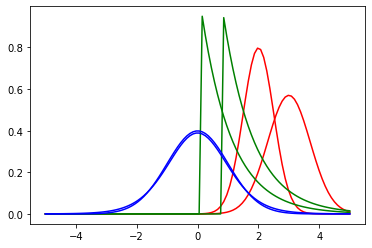

In [8]:
plt.plot(x, generate_norm_rv(x, 2.0, 0.5), color='r', label='norm_rv_pdf')
plt.plot(x, generate_norm_rv(x, 3.0, 0.7), color='r', label='norm_rv_pdf')
plt.plot(x, generate_expon_rv(x, 0.1), color='g', label='expon_rv_pdf')
plt.plot(x, generate_expon_rv(x, 0.8), color='g', label='expon_rv_pdf')
plt.plot(x, generate_t_rv(x, 10), color='b', label='t_rv_pdf')
plt.plot(x, generate_t_rv(x, 5000), color='b', label='t_rv_pdf')

## Уровень 1:

- Задание 2

Непрерывная случайная величина задана плотностью распределения:$$ f(\xi) = C, \xi \in [0;5];f(\xi) = 0, \xi \notin [0;5]$$Найдите C, математическое ожидание $\xi$ а также вероятность попадания  в отрезок $[3.5;7]$, т.е. P(3.5 &lt; $\xi$ &lt; 7).

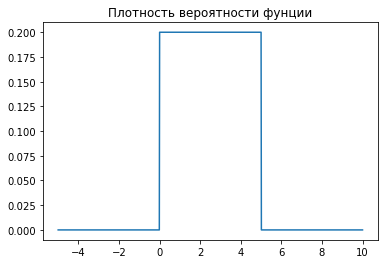

In [23]:
# Найдём С - коэффициент равномерного распределения
a = 0
b = 5
uni = uniform(a, b - a)
x = np.linspace(-5, 10, 1000)
pdf = uni.pdf(x)
plt.plot(x, pdf)
plt.title('Плотность вероятности фунции')
plt.show()

In [26]:
C = uni.pdf(np.random.uniform(a, b))
print(f'Плотность вероятности имеет максимум в точке {C}')

Плотность вероятности имеет максимум в точке 0.2


In [29]:
# Найдём математическое ожидание
M = quad(lambda x: x * 1/5, 0, 5)[0]
print(f'Математическое ожидание равно {M}')


Математическое ожидание равно 2.5


In [31]:
# Вероятность попадания в отрезок [3.5, 7]
P = round(quad(lambda x: 1/5, 3.5, 5)[0], 1)
print(f'Вероятность попадания в интервал [3.5, 7] равно {P}')

Вероятность попадания в отрезок [3.5, 7] равно 0.3


In [37]:
# Вариант 2:
a = 0
b = 5
uni = sts.uniform(a, b-a)
C = uni.pdf(3)
print('C:', C)
print('математическое ожидание:', uni.mean())
print('вероятность попадания в отрезок [3.5;7]:', uni.cdf(7) - uni.cdf(3.5))

C: 0.2
математическое ожидание: 2.5
вероятность попадания в отрезок [3.5;7]: 0.30000000000000004


- Задание 3


Известно, что светофор горит 54 секунды красным, 4 секунды жёлтым и 28 секунд зелёным. Посчитайте, какое количество информации несёт сообщение о цвете светофора в текущий момент. А что будет в случае 28, 28 и 28 секунд для каждого цвета?

Так как цветов у светофора всего 3, то мы ищем минимальную степень двойки, которая ближе к 3 и превышает 3. Это 4, то есть 2^2, значит ответ 2 бита несёт сообщение о цвете светофора в текущий момент

In [40]:
n = 54 + 4 + 28
p_red = 54 / n
p_green = 28 / n
p_yellow = 4 / n

print('Вероятность появления зеленого цвета:', p_green)
print('Вероятность появления желтого цвета:', p_yellow)
print('Вероятность появления красного цвета:', p_red)

assert p_green + p_yellow + p_red == 1, 'Вероятности цветов светофора найдены некорректно'

inf = - (p_green * np.log2(p_green) + p_yellow * np.log2(p_yellow) + p_red * np.log2(p_red))
print('Количество информации сообщения о светофоре в текущий момент:', inf)


Вероятность появления зеленого цвета: 0.32558139534883723
Вероятность появления желтого цвета: 0.046511627906976744
Вероятность появления красного цвета: 0.627906976744186
Количество информации сообщения о светофоре в текущий момент: 1.154522162441165


In [42]:
# В случае одинаковых вероятностей появления каждого цвета можно взять формуду Хартли
n = 3
inf = np.log2(n)
print('Количество информации сообщения о светофоре в текущий момент:', inf)

Количество информации сообщения о светофоре в текущий момент: 1.584962500721156
